# Schokoriegel

Sie arbeiten für einen Schokoladenhersteller und haben einen neuen Schokoriegel entwickelt.
Um zu entscheiden was der ideale Verkaufspreis ist, setzen Sie ein Experiment auf. In sechs Läden bieten
Sie das Produkt zu unterschiedlichen Preisen für eine Dauer von 2 Wochen an. Sie zählen jeweils die Anzahl der 
verkauften Riegel:



| Laden |Preis (Euro)|Verkaufte Riegel|
| ------|------------|----------------|
|   1   |     20     |       2        |
|   2   |     16     |       4        |
|   3   |     15     |       4        |  
|   4   |     14     |       7        | 
|   5   |     13     |       8        |
|   6   |     10     |       10       |

a) Zeichnen sie den passenden Scatterplot der Daten
   + händisch
   + matplotlib

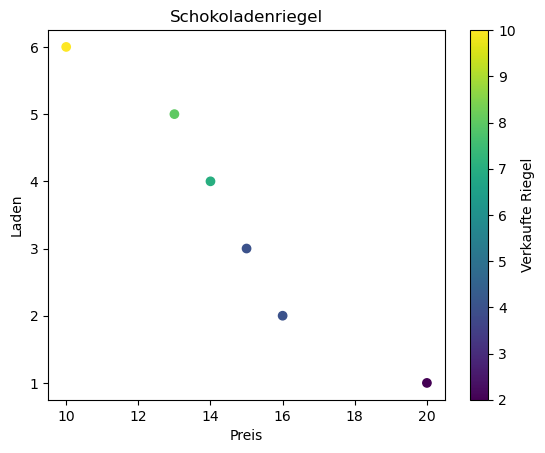

In [1]:
import matplotlib.pyplot as plt
import numpy as np

laden = [1, 2, 3, 4, 5, 6]
preis = [20, 16, 15, 14, 13, 10]
verkaufte_riegel = [2, 4, 4, 7, 8, 10]

plt.scatter(preis, laden, c=verkaufte_riegel, cmap='viridis')
plt.colorbar(label='Verkaufte Riegel')
plt.xlabel('Preis')
plt.ylabel('Laden')
plt.title('Schokoladenriegel')
plt.show()

b) Bestimmen Sie die Regressionsgerade und berechnen sie diese händisch Mittel Ordinary Least Square.

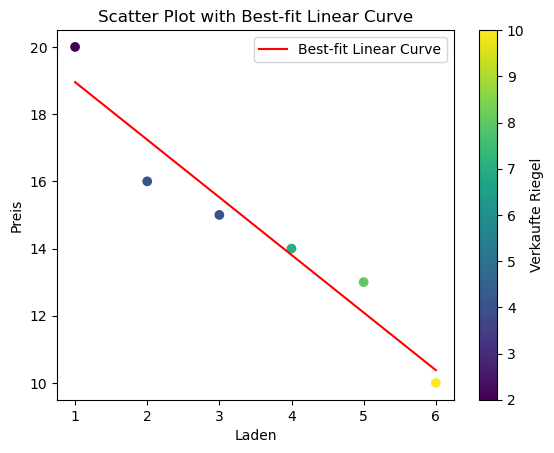

In [2]:
laden = np.array([1, 2, 3, 4, 5, 6])
preis = np.array([20, 16, 15, 14, 13, 10])
verkaufte_riegel = np.array([2, 4, 4, 7, 8, 10])

mean_laden = np.mean(laden)
mean_preis = np.mean(preis)
deviation_laden = laden - mean_laden
deviation_preis = preis - mean_preis
slope = np.sum(deviation_laden * deviation_preis) / np.sum(deviation_laden ** 2)
y_intercept = mean_preis - slope * mean_laden

regression_line = slope * laden + y_intercept

plt.scatter(laden, preis, c=verkaufte_riegel, cmap='viridis')
plt.colorbar(label='Verkaufte Riegel')
plt.xlabel('Laden')
plt.ylabel('Preis')
plt.title('Scatter Plot with Best-fit Linear Curve')

plt.plot(laden, regression_line, color='red', label='Best-fit Linear Curve')

plt.legend()
plt.show()

# Implementierung der Linearen Regression

Schreiben Sie eine Klasse MyLinReg, die eine Lineare Regression mit einem abhängigen Parameter erlauben soll.
Eine Funktion fit() soll die Regressionsparamter mittels Gradientenabstieg bestimmen


Testen Sie ihr System mit einem Merkmal des Diabetes-Datensets. Train=Test sind für diese Aufgabe ok.




Linear regression, MSE loss, batch gradient

In [3]:
class MyLinReg:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.intercept = 0.0
        self.coefficient = 0.0
    
    def fit(self, X, y):
        num_samples = len(X)
        
        for _ in range(self.num_iterations):
            y_pred = self.coefficient * X + self.intercept
            
            d_coefficient = (-2/num_samples) * sum(X * (y - y_pred))
            d_intercept = (-2/num_samples) * sum(y - y_pred)
            
            self.coefficient -= self.learning_rate * d_coefficient
            self.intercept -= self.learning_rate * d_intercept
    
    def predict(self, X):
        return self.coefficient * X + self.intercept

In [4]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

X = diabetes_dataset['data'][:, [0, 1]]
y = diabetes_dataset['target']

y = y.reshape(-1, 1)

Hold-out non stratified, test size 0.25, random state 42

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

regression = MyLinReg()

regression.fit(X_train, y_train)
y_pred= regression.predict(X_test)

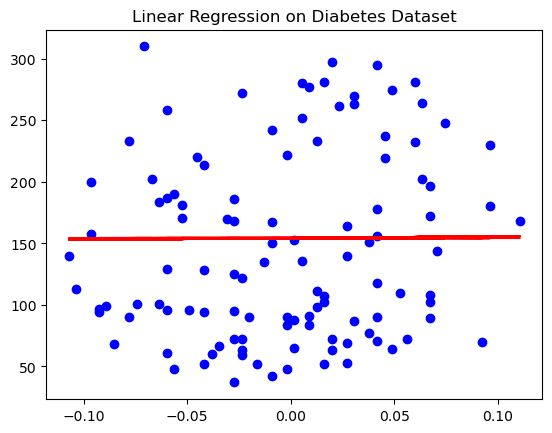

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_test[:, 0], y_test, color='blue', label='Original Data')
plt.plot(X_test[:, 0], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression on Diabetes Dataset')
plt.show()

# Regressionsbeispiel

Verwenden Sie den California housing Corpus oder den Boston Corpus aus sklearn und führen sie mittels 
Methoden aus sklearn eine lineare regression durch.

Verwenden Sie dabei das Konzept der LOO-Evaluation für Regression, das in der Vorlesung besprochen wurde.


Leave-one-out linear regression

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

housing_dataset = fetch_california_housing()
X = housing_dataset['data'][:, [0, 1]]
y = housing_dataset['target']

In [54]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
y_pred_loo = np.zeros_like(y) 

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred_loo[test_index] = reg.predict(X_test)
    
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
mse = mean_squared_error(y_pred, y)

x_line = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100).reshape(-1, 1)
y_line = reg.predict(np.hstack((x_line, np.zeros_like(x_line))))

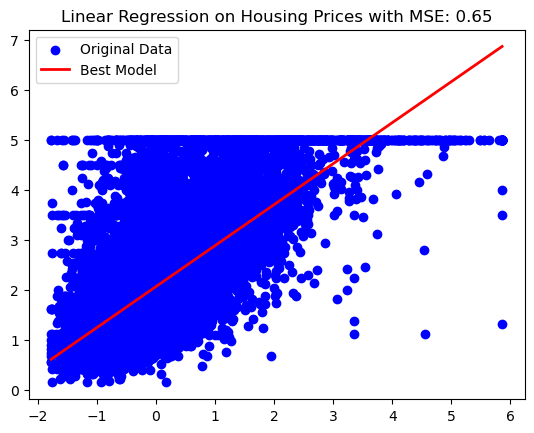

In [55]:
plt.scatter(X[:, 0], y, color='blue', label='Original Data')

plt.plot(x_line, y_line, color='red', linewidth=2, label='Best Model')

plt.title(f'Linear Regression on Housing Prices with MSE: {mse:.2f}')
plt.legend()
plt.show()

# Eigenständige Implementierung der multiplen Linearen Regression.

Schreiben Sie eine Klasse *MyLinRegMult* die die multiple lineare Regression implementiert.
Das Training der Regression ist mittels Gradientenabstiegsverfahren zu implementieren.


Leave-one-out multiple linear regression, MSE loss, batch gradient

In [26]:
class MyLinRegMult:
    def __init__(self, learning_rate=0.01, num_iterations=10):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coefficients = None

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        num_samples, num_features = X.shape

        self.coefficients = np.zeros(num_features)

        for _ in range(self.num_iterations):
            y_pred = np.dot(X, self.coefficients)

            gradient = (1 / num_samples) * np.dot(X.T, (y_pred - y))

            self.coefficients -= self.learning_rate * gradient
            

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        y_pred = np.dot(X, self.coefficients)

        return y_pred

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

loo = LeaveOneOut()
y_pred_loo = np.zeros_like(y) 

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg_mult = MyLinRegMult()
    reg_mult.fit(X_train, y_train)
    y_pred_loo[test_index] = reg_mult.predict(X_test)

reg = MyLinRegMult()
reg.fit(X, y)
y_pred = reg.predict(X)
mse = mean_squared_error(y_pred, y)

x_line = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100).reshape(-1, 1)
x_line_scaled = scaler.transform(np.hstack((x_line, np.zeros_like(x_line))))

y_line = reg.predict(x_line_scaled)

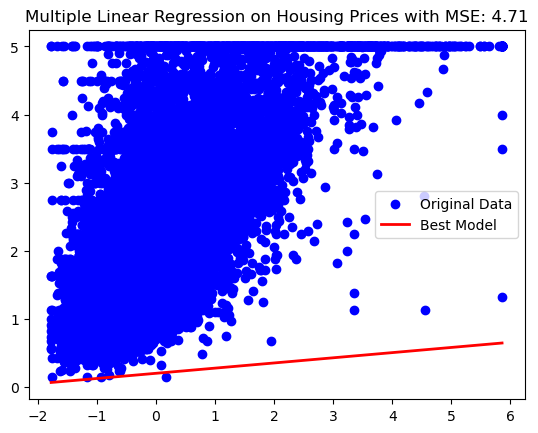

In [48]:
plt.scatter(X[:, 0], y, color='blue', label='Original Data')

plt.plot(x_line, y_line, color='red', linewidth=2, label='Best Model')

plt.title(f'Multiple Linear Regression on Housing Prices with MSE: {mse:.2f}')
plt.legend()
plt.show()

Interpretation: Auf diesem dataset mit den ausgewählten features single linear regression performanter als multiple linear regression